In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from scipy.stats import spearmanr,pearsonr
from statsmodels.stats.multitest import multipletests
from skbio.stats.composition import clr as CLR
from skbio.diversity import alpha_diversity
sns.set(context='talk',style='ticks',font_scale=1,rc ={'axes.spines.right': False,'axes.spines.top': False,'pdf.fonttype':42,'ps.fonttype':42},palette='colorblind')

# Look at correlations between genus log abundance and chemical concentrations at ORR field site

In [70]:
chems=pd.read_excel('data/100_Well_Survey_Chemical_Abundance_Data.xlsx',index_col=0)
chems=chems.T
chems['hazen_nitrate_mm']=chems['hazen_nitrate_mg_l']/62.0049
chems

,adams_nitrate_um,hazen_n2_ppm,hazen_n2o_ppm,hazen_nitrate_mg_l,hazen_uranium_mg_l,hazen_n2_mm,hazen_n2o_mm,hazen_nitrate_mm
FW106-7-25-12,38049.843600,261583.85,36337.44,3311.200000,17.980188,0.000000,0.0,53.402231
FW109-1-7-25-12,16780.392300,601237.21,23385.35,913.814000,2.813764,0.000000,0.0,14.737771
FW109-2-7-25-12,6502.045460,675813.86,15151.15,505.920000,9.402885,0.000000,0.0,8.159355
FW126-7-25-12,3884.955390,150841.12,20804.59,10261.500000,43.352669,0.000000,0.0,165.494985
FW300-7-25-12,16.912510,962458.21,0.00,0.293577,0.018327,0.000000,0.0,0.004735
...,...,...,...,...,...,...,...,...
GW066-71-2-20-13 10 micron filter,42.505850,0.00,0.00,0.855630,0.015852,3.377147,0.0,0.013799
GW125-85-2-20-13 0.2 micron filter,102.199274,0.00,0.00,2.229041,0.004834,3.392626,0.0,0.035949
GW125-85-2-20-13 10 micron filter,102.199274,0.00,0.00,2.229041,0.004834,3.392626,0.0,0.035949
GW705-9-2-21-13 0.2 micron filter,0.000000,0.00,0.00,0.000000,0.004818,1.765972,0.0,0.000000


In [16]:
otus= pd.read_csv('data/eotus.wells.log.10.filtered',sep='\t',index_col=0).iloc[:,:-1]
otus=10**(otus)
otus=otus.divide(otus.sum(axis=1),axis=0)


,ID0000005M_10,ID0000009M_10,ID0000010M_10,ID0000011M_10,ID0000016M_10,ID0000017M_10,ID0000019M_10,ID0000020M_10,ID0000021M_10,ID0000024M_10,...,ID0470689M_10,ID0492605M_10,ID0494304M_10,ID0575822M_10,ID0620006M_10,ID0762147M_10,ID0765537M_10,ID1252327M_10,ID1468124M_10,ID1829647M_10
DP16D_67_11_27_12,2.188271e-09,6.566576e-05,1.079439e-08,1.347909e-18,2.188271e-09,2.745659e-08,1.347909e-18,1.931637e-07,1.079439e-08,2.188271e-09,...,1.347909e-18,1.347909e-18,1.347909e-18,1.347909e-18,1.347909e-18,1.347909e-18,1.079439e-08,1.347909e-18,1.347909e-18,1.347909e-18
FW021_46_11_27_12,4.772618e-10,1.224056e-03,1.876326e-10,2.342991e-20,3.803742e-11,3.803742e-11,2.342991e-20,3.346226e-08,2.342991e-20,3.803742e-11,...,2.342991e-20,2.342991e-20,2.342991e-20,2.342991e-20,2.342991e-20,2.342991e-20,2.342991e-20,2.342991e-20,2.342991e-20,2.342991e-20
FW104_67_11_14_12,1.937963e-07,2.419958e-17,4.929397e-07,1.199674e-05,2.419958e-17,2.419958e-17,3.928694e-08,2.419958e-17,3.928694e-08,2.419958e-17,...,2.419958e-17,2.419958e-17,3.928694e-08,2.419958e-17,2.419958e-17,3.467949e-06,8.440269e-05,3.207548e-04,2.419958e-17,2.419958e-17
FW106_11_13_12,4.181991e-18,4.181991e-18,3.349042e-08,3.710184e-05,3.349042e-08,4.181991e-18,4.181991e-18,1.068954e-06,3.349042e-08,4.181991e-18,...,4.181991e-18,4.181991e-18,1.068954e-06,6.789276e-09,4.181991e-18,4.181991e-18,4.129670e-05,4.181991e-18,4.181991e-18,4.181991e-18
FW109_35_61_11_14_12,1.761216e-06,3.191127e-04,3.075439e-04,1.610011e-19,1.610011e-19,2.398913e-05,3.279554e-09,1.610011e-19,1.610011e-19,1.289337e-09,...,1.610011e-19,1.610011e-19,1.610011e-19,1.610011e-19,1.610011e-19,1.610011e-19,1.610011e-19,1.610011e-19,1.610011e-19,1.610011e-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GW803_31_1_23_13,3.821979e-05,1.859469e-20,2.200328e-04,1.859469e-20,1.859469e-20,3.332594e-07,3.018766e-11,1.489109e-10,1.859469e-20,9.981897e-01,...,1.859469e-20,1.859469e-20,1.859469e-20,1.859469e-20,1.489109e-10,1.859469e-20,1.859469e-20,1.859469e-20,1.859469e-20,1.859469e-20
GW804_13_2_11_13,6.552658e-04,2.492243e-18,4.814082e-01,2.492243e-18,1.976117e-05,1.995850e-08,2.492243e-18,6.934877e-05,2.492243e-18,6.095212e-06,...,2.492243e-18,2.492243e-18,2.492243e-18,2.492243e-18,1.235509e-06,5.076641e-08,2.492243e-18,2.492243e-18,2.492243e-18,2.504419e-07
GW921_86_1_28_13,1.995789e-02,6.796390e-17,9.964291e-03,6.796390e-17,2.757548e-05,1.360397e-04,6.796390e-17,1.103364e-07,3.369253e-05,5.537961e-01,...,6.796390e-17,1.384409e-06,6.829592e-06,6.796390e-17,1.103364e-07,6.796390e-17,6.796390e-17,6.796390e-17,9.739644e-06,6.796390e-17
GW925_68_1_28_13,1.657725e-07,8.281810e-20,2.698117e-08,8.281810e-20,6.194836e-07,1.344515e-10,8.281810e-20,8.281810e-20,2.435376e-07,9.908339e-06,...,8.281810e-20,8.281810e-20,8.281810e-20,8.281810e-20,6.632279e-10,8.281810e-20,8.281810e-20,8.281810e-20,8.281810e-20,8.281810e-20


In [18]:
tax = pd.read_csv('eotus.lins',sep='\t',index_col=0,header=None)
tax.columns=['tax']
tax.index.name=''
index = [x.split('_')[0] for x in otus.columns]
tax=tax.reindex(index).dropna()
a = []
for i in range(len(tax.index)):
    a.append([x.split('__')[1] for x in tax.iloc[i,0].split(';')])
tax = pd.DataFrame(a,index=tax.index,columns=[x.split('__')[0] for x in tax.iloc[i,0].split(';')])
tax

,k,p,c,o,f,g,s
,,,,,,,
ID0000005M,Bacteria,Actinobacteria,Actinobacteria,Actinomycetales,Micrococcaceae,Arthrobacter,
ID0000009M,Bacteria,Proteobacteria,Betaproteobacteria,Burkholderiales,Comamonadaceae,,
ID0000010M,Bacteria,Proteobacteria,Alphaproteobacteria,Caulobacterales,Caulobacteraceae,Brevundimonas,
ID0000011M,Bacteria,Firmicutes,Clostridia,Clostridiales,,,
ID0000016M,Bacteria,Proteobacteria,Betaproteobacteria,Hydrogenophilales,Hydrogenophilaceae,Thiobacillus,
...,...,...,...,...,...,...,...
ID0762147M,Bacteria,Acidobacteria,Acidobacteria_Gp4,,,Gp4,
ID0765537M,Bacteria,Proteobacteria,Betaproteobacteria,Rhodocyclales,Rhodocyclaceae,,
ID1252327M,Bacteria,Planctomycetes,Planctomycetacia,Planctomycetales,Planctomycetaceae,,


In [20]:
idx1=[]
idx2=[]
for i in tax.index:
    g=tax.loc[i,'g']
    if g == 'Acidovorax':
        idx1.append(i.strip())
    elif g =='Rhodanobacter':
        idx2.append(i.strip())

In [22]:
meta = pd.read_csv('enigma.meta',sep='\t',index_col=0)
wells=[x[:-3] for x in meta.index if x[-3:] == '_10' and x[:-3] not in ['GW760_18_1_29_13', 'GW929_2_11_13', 'PTMW02_4_12_11_12', 'TPB16_81_11_28_12']] 
meta

,AODC_cellsmL,Ag_mgL,Al_mgL,As_mgL,Ba_mgL,Be_mgL,Bi_mgL,Boring_depth,Bot_depth,Bot_elevation,...,Sr_mgL,Sulfide_mgL,Temperature_C,Top_depth,Top_elevation,U_mgL,Zn_mgL,pH,I_all_mgL,S_all_mgL
DP16D_67_11_27_12_02,69200.0,0.010549,3.444126,0.010733,0.269124,0.040768,0.009233,23.50,22.15,976.57,...,0.371880,0.000,17.05,17.32,981.40,0.744412,0.078332,6.67,6038.684860,5515.175305
DP16D_67_11_27_12_10,69200.0,0.010549,3.444126,0.010733,0.269124,0.040768,0.009233,23.50,22.15,976.57,...,0.371880,0.000,17.05,17.32,981.40,0.744412,0.078332,6.67,6038.684860,5515.175305
FW021_46_11_27_12_02,223000.0,0.010662,114.501000,0.010733,2.073446,0.078521,0.009233,23.00,22.00,982.62,...,1.372827,0.004,16.41,17.23,987.39,3.751466,0.896697,3.43,195596.838205,200786.283419
FW021_46_11_27_12_10,223000.0,0.010662,114.501000,0.010733,2.073446,0.078521,0.009233,23.00,22.00,982.62,...,1.372827,0.004,16.41,17.23,987.39,3.751466,0.896697,3.43,195596.838205,200786.283419
FW021_7_26_12_02,178000.0,0.002400,NaN,0.001300,1.796500,0.039300,0.015400,23.00,22.00,982.62,...,0.926800,0.004,25.07,17.23,987.39,1.473900,0.493200,3.82,107840.996755,99284.779799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PTMW02_4_12_11_12_10,45800.0,0.021127,4.221715,0.005366,0.332629,0.040563,0.004617,45.00,44.70,947.87,...,2.133306,NaN,14.42,34.70,957.87,0.851718,0.181435,4.72,80088.633816,88119.380761
TPB16_7_26_12_02,52200.0,0.002400,NaN,0.000300,0.083400,0.029300,0.015400,15.29,15.29,982.92,...,0.392800,0.010,26.79,13.29,984.92,1.146600,0.044300,7.10,2058.301308,1929.583827
TPB16_7_26_12_3,52200.0,0.002400,NaN,0.000300,0.083400,0.029300,0.015400,15.29,15.29,982.92,...,0.392800,0.010,26.79,13.29,984.92,1.146600,0.044300,7.10,2058.301308,1929.583827
TPB16_81_11_28_12_02,28100.0,0.010616,0.012898,0.010733,0.102513,0.040768,0.009233,15.29,15.29,982.92,...,0.395558,0.107,18.59,13.29,984.92,1.532647,0.031075,6.58,3141.811652,3204.916438


In [28]:
acidovorax =otus.loc[wells].dropna()[[x+'_10' for x in idx1]]
rhodano = otus.loc[wells].dropna()[[x+'_10' for x in idx2]]
acidovorax=acidovorax.sum(axis=1)
rhodano=rhodano.sum(axis=1)
df=pd.DataFrame(np.array([acidovorax,rhodano]).T)
df.columns=['acidovorax','rhodanobacter']
df.index=rhodano.index
df=np.log10(df)

wells2=[x+'_10' for x in df.index]
cols = ['NO3_mgL', 'N2O_mM','pH','DOC_mgL','O2_mM']
temp = meta.loc[wells2,cols].dropna()
for col in cols:
    df.loc[[x[:-3] for x in temp.index],col]=temp[col].values
df=df.dropna()
df['CN']=df['DOC_mgL'].values/df['NO3_mgL'].values

cutoff=-6
df['co-occurance']=0
idx=df[(df['acidovorax']>cutoff)&(df['rhodanobacter']>cutoff)].index.values
df.loc[idx,'co-occurance']=1
df['ratio']=np.log10(df['acidovorax']/df['rhodanobacter'])
df['log_N2O_mM']=np.log10(df['N2O_mM']+.1)
df['NO3_mM']=df['NO3_mgL']/62.0049
df['shannon']=alpha_diversity('shannon',otus.loc[wells],ids=otus.loc[wells].index)
df

,acidovorax,rhodanobacter,NO3_mgL,N2O_mM,pH,DOC_mgL,O2_mM,CN,co-occurance,ratio,log_N2O_mM,NO3_mM,shannon
DP16D_67_11_27_12,-8.659899,-3.871651,141.0220,0.000000,6.67,2.326,0.171486,0.016494,0,0.349617,-1.000000,2.274369,0.490327
FW021_46_11_27_12,-9.422715,-1.461162,4506.9000,0.874728,3.43,7.298,0.179880,0.001619,0,0.809478,-0.011116,72.686191,0.548839
FW104_67_11_14_12,-2.823993,-6.242973,9068.7000,1.160096,5.22,6.505,0.105994,0.000717,0,-0.344528,0.100404,146.257796,2.982659
FW106_11_13_12,-2.591668,-4.435154,2692.0400,0.628111,3.55,47.870,0.231141,0.017782,1,-0.233329,-0.137803,43.416569,2.468577
FW109_35_61_11_14_12,-6.939321,-0.048315,570.4600,0.320393,3.68,4.505,0.197456,0.007897,0,2.157232,-0.376345,9.200241,0.904473
...,...,...,...,...,...,...,...,...,...,...,...,...,...
GW782_72_2_18_13,-6.916506,-18.312843,2.8996,0.000000,7.52,0.710,0.323221,0.244861,0,-0.422869,-1.000000,0.046764,0.027246
GW803_31_1_23_13,-7.455752,-7.148296,33.8871,0.000000,5.40,0.309,0.704129,0.009119,0,0.018289,-1.000000,0.546523,0.016801
GW804_13_2_11_13,-4.343550,-6.752708,10.8117,0.000000,4.91,0.540,0.528898,0.049946,0,-0.191633,-1.000000,0.174368,1.870257
GW921_86_1_28_13,-2.649579,-5.137657,0.1442,0.000000,7.46,0.488,0.668788,3.384189,1,-0.287588,-1.000000,0.002326,2.020849


LinregressResult(slope=0.003943339981920834, intercept=0.026514474898691277, rvalue=0.6126804507474427, pvalue=4.7363896005155474e-45, stderr=0.0002476183600792236, intercept_stderr=0.009514764190740791)

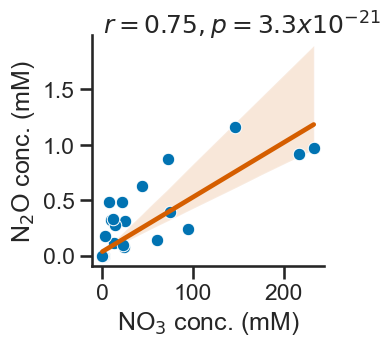

In [38]:
from scipy.stats import linregress
fit=linregress(chems.hazen_nitrate_mm,chems.hazen_n2o_mm)

plt.figure(figsize=(3,3))
sns.regplot(x='NO3_mM',y='N2O_mM',data=df,color='r',scatter=False)
sns.scatterplot(x='NO3_mM',y='N2O_mM',data=df)
plt.ylabel('N$_2$O conc. (mM)')
plt.xlabel('NO$_3$ conc. (mM)')
#plt.legend(bbox_to_anchor=(1,1))
plt.text(1,2,'$r=0.75,p=3.3x10^{-21}$'%())
fit
#plt.savefig('no3_vs_no2.pdf',bbox_inches='tight')

In [40]:
import statsmodels.api as sm

def lowess_with_confidence_bounds(
    x, y, eval_x, N=200, conf_interval=0.95, lowess_kw=None
):
    """
    Perform Lowess regression and determine a confidence interval by bootstrap resampling
    """
    # Lowess smoothing
    smoothed = sm.nonparametric.lowess(exog=x, endog=y, xvals=eval_x, **lowess_kw)

    # Perform bootstrap resamplings of the data
    # and  evaluate the smoothing at a fixed set of points
    smoothed_values = np.empty((N, len(eval_x)))
    for i in range(N):
        sample = np.random.choice(len(x), len(x), replace=True)
        sampled_x = x[sample]
        sampled_y = y[sample]

        smoothed_values[i] = sm.nonparametric.lowess(
            exog=sampled_x, endog=sampled_y, xvals=eval_x, **lowess_kw
        )

    # Get the confidence interval
    sorted_values = np.sort(smoothed_values, axis=0)
    bound = int(N * (1 - conf_interval) / 2)
    bottom = sorted_values[bound - 1]
    top = sorted_values[-bound]

    return smoothed, bottom, top




PearsonRResult(statistic=0.5887585197087912, pvalue=0.0004936202902173274)


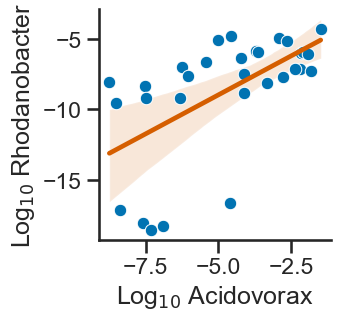

In [42]:
#filter on abundance (>-10)
from scipy.stats import linregress
plt.figure(figsize=(3,3))
temp = df[df['pH']>=7]
#temp=temp[temp.rhodanobacter>-15]
sns.regplot(x='acidovorax',y='rhodanobacter',data=temp,scatter=False,color='r')
sns.scatterplot(x='acidovorax',y='rhodanobacter',data=temp)


x,y=temp['acidovorax'],temp['rhodanobacter']

print(pearsonr(x,y))
plt.ylabel('Log$_{10}$ Rhodanobacter')
plt.xlabel('Log$_{10}$ Acidovorax')
plt.savefig('acido-vs-rhodano-abund.pdf',bbox_inches='tight')

PearsonRResult(statistic=-0.3605908822088438, pvalue=0.0020076327635228266)
PearsonRResult(statistic=-0.02411641397741994, pvalue=0.8417695205103441)


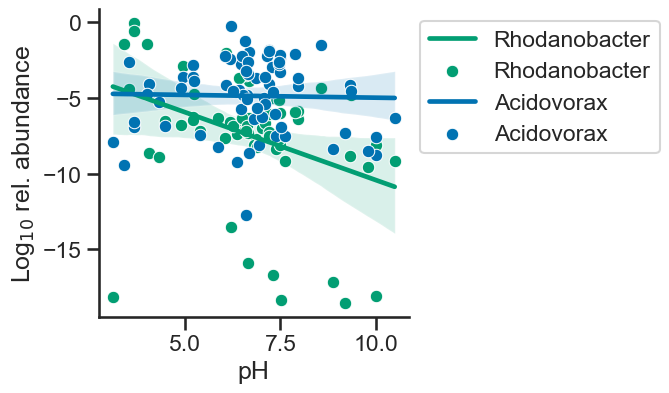

In [44]:
plt.figure(figsize=(4,4))
c=sns.color_palette('colorblind')
temp = df[df['N2O_mM']>=0]
x,y=temp['pH'],temp['rhodanobacter']
sns.regplot(x=x,y=y,label='Rhodanobacter',color=c[2],scatter=False)
sns.scatterplot(x=x,y=y,label='Rhodanobacter',color=c[2])
print(pearsonr(x,y))
x,y=temp['pH'],temp['acidovorax']
sns.regplot(x=x,y=y,label='Acidovorax',color=c[0],scatter=False)
sns.scatterplot(x=x,y=y,label='Acidovorax',color=c[0])
print(pearsonr(x,y))
plt.ylabel('Log$_{10}$ rel. abundance')
plt.xlabel('pH')
plt.legend(loc=2,bbox_to_anchor=(1,1))
#plt.ylim(-11,1)
#plt.savefig('pH-abundanace.pdf',bbox_inches='tight')

PearsonRResult(statistic=0.274462478936794, pvalue=0.02054266274647835)
PearsonRResult(statistic=-0.08161986160519656, pvalue=0.4986191165454371)


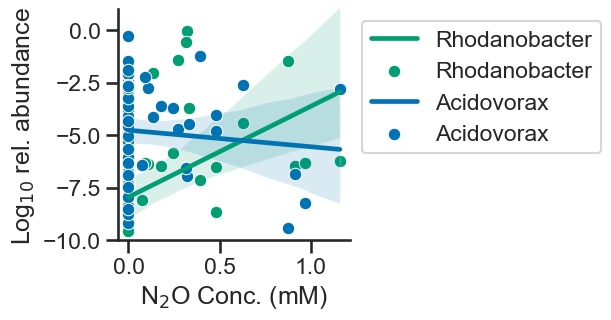

In [46]:
plt.figure(figsize=(3,3))
c=sns.color_palette('colorblind')
temp = df[df['pH']>0]
x,y=temp['N2O_mM'],temp['rhodanobacter']
sns.regplot(x=x,y=y,label='Rhodanobacter',color=c[2],scatter=False)
sns.scatterplot(x=x,y=y,label='Rhodanobacter',color=c[2])
print(pearsonr(x,y))
x,y=temp['N2O_mM'],temp['acidovorax']
sns.regplot(x=x,y=y,label='Acidovorax',color=c[0],scatter=False)
sns.scatterplot(x=x,y=y,label='Acidovorax',color=c[0])
print(pearsonr(x,y))
plt.ylabel('Log$_{10}$ rel. abundance')
plt.xlabel('N$_{2}$O Conc. (mM)')
plt.legend(loc=2,bbox_to_anchor=(1,1))
plt.ylim(-10,1)
plt.savefig('N2O-abundanace.pdf',bbox_inches='tight')
plt.savefig('N2O-abundanace.png',bbox_inches='tight',dpi=250)

PearsonRResult(statistic=0.41418719257158465, pvalue=0.00032972155252998064)
PearsonRResult(statistic=0.01345486814436217, pvalue=0.9113266133598408)


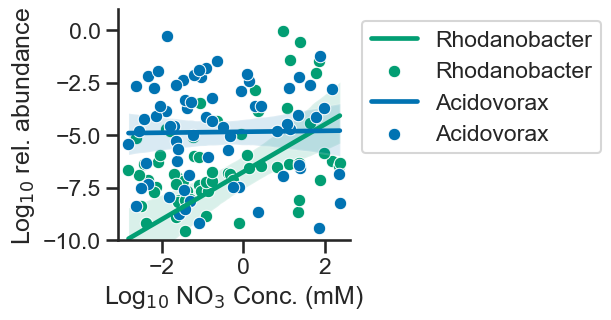

In [47]:
plt.figure(figsize=(3,3))
c=sns.color_palette('colorblind')
temp = df[df['pH']>=0]
x,y=temp['NO3_mM'],temp['rhodanobacter']
x=np.log10(x)
sns.regplot(x=x,y=y,label='Rhodanobacter',color=c[2],scatter=False)
sns.scatterplot(x=x,y=y,label='Rhodanobacter',color=c[2])
print(pearsonr(x,y))
x,y=temp['NO3_mM'],temp['acidovorax']
x=np.log10(x)
sns.regplot(x=x,y=y,label='Acidovorax',color=c[0],scatter=False)
sns.scatterplot(x=x,y=y,label='Acidovorax',color=c[0])
print(pearsonr(x,y))
plt.ylabel('Log$_{10}$ rel. abundance')
plt.xlabel('Log$_{10}$ NO$_{3}$ Conc. (mM)')
plt.legend(loc=2,bbox_to_anchor=(1,1))
plt.ylim(-10,1)
plt.savefig('NO3-abundanace.pdf',bbox_inches='tight')
plt.savefig('NO3-abundanace.png',bbox_inches='tight',dpi=250)

SignificanceResult(statistic=-0.47360831656606295, pvalue=3.025309783074024e-05)
SignificanceResult(statistic=-0.11294433266264252, pvalue=0.34834785603773566)


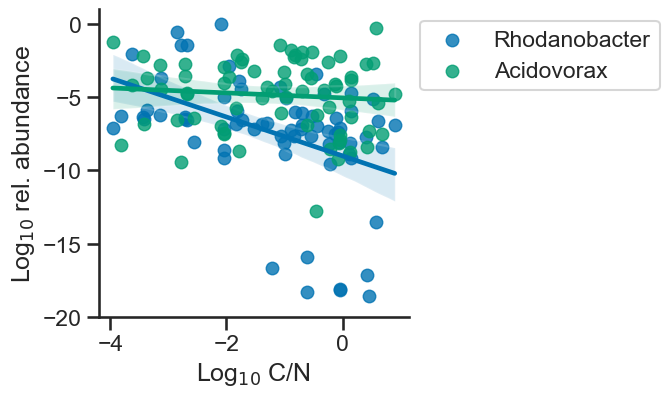

In [54]:
plt.figure(figsize=(4,4))
c=sns.color_palette('colorblind')
x,y=df['CN'],df['rhodanobacter']
sns.regplot(x=np.log10(x),y=y,label='Rhodanobacter',color=c[0])
print(spearmanr(np.log10(x),y))
x,y=df['CN'],df['acidovorax']
sns.regplot(x=np.log10(x),y=y,label='Acidovorax',color=c[2])
print(spearmanr(np.log10(x),y))
plt.ylabel('Log$_{10}$ rel. abundance')
plt.xlabel('Log$_{10}$ C/N')
plt.legend(loc=2,bbox_to_anchor=(1,1))
plt.ylim(-20,1)
plt.savefig('CN-abundanace.pdf',bbox_inches='tight')
plt.savefig('CN-abundanace.png',bbox_inches='tight',dpi=250)

In [56]:
x=df[['acidovorax','NO3_mgL','N2O_mM']]
x['NO3_mgL']=np.log10(x['NO3_mgL'])
y=df['rhodanobacter']
model = sm.OLS(y, sm.add_constant(x))
results = model.fit()
results.summary()

/var/folders/06/47zwkw994h38rfpphgtmmm380000gq/T/ipykernel_59562/2541743792.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['NO3_mgL']=np.log10(x['NO3_mgL'])


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          rhodanobacter   R-squared:                       0.189
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     5.204
Date:                Wed, 04 Sep 2024   Prob (F-statistic):            0.00273
Time:                        15:25:14   Log-Likelihood:                -191.17
No. Observations:                  71   AIC:                             390.3
Df Residuals:                      67   BIC:                             399.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.7879      1.060     -7.344      0.000      -9.905      -5.671
acidovorax     0.2073      0.181      1.144      0.257      -0.154       0.569
NO3_mgL        1.1934      0.441      2.704      0.009       0.312       2.074
N2O_mM        -0.5225      2.548     -0.205      0.838      -5.609       4.564
==============================================================================
Omnibus:                       16.482   Durbin-Watson:                   2.284
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.072
Skew:                          -1.139   Prob(JB):                     7.22e-05
Kurtosis:                       4.121   Cond. No.                         33.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
temp=tax['g'].copy()
for i in temp.index:
    if temp.loc[i] == '' or temp.loc[i] == ' ':
        temp.loc[i] = 'Unknown'
temp.index=[i+'_10' for i in temp.index]
taxmap=temp.to_dict()
genus=otus.copy()
genus.columns=[taxmap[x] for x in genus.columns]
genus=genus.groupby(level=0,axis=1).sum().reindex(df.index)
genus=np.log10(genus)
genus

/var/folders/06/47zwkw994h38rfpphgtmmm380000gq/T/ipykernel_59562/2270580802.py:9: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  genus=genus.groupby(level=0,axis=1).sum().reindex(df.index)


,Acidovorax,Acinetobacter,Actinomycetospora,Aeromicrobium,Aeromonas,Afipia,Aminobacter,Anaeromyxobacter,Aquabacterium,Aquicella,...,Thiohalophilus,Turneriella,Undibacterium,Unknown,Variovorax,Victivallis,Vogesella,WS3_genera_incertae_sedis,Williamsia,Zoogloea
DP16D_67_11_27_12,-8.659899,-17.870339,-17.870339,-17.870339,-17.870339,-17.870339,-17.393218,-17.393218,-7.623842,-17.268279,...,-17.870339,-7.050541,-17.870339,-0.032129,-17.171369,-8.659899,-17.870339,-7.966802,-17.870339,-7.966802
FW021_46_11_27_12,-9.422715,-10.419789,-19.630229,-19.630229,-19.630229,-10.419789,-10.419789,-19.153108,-6.634380,-19.028169,...,-19.630229,-19.630229,-19.630229,-2.036095,-9.033570,-19.329199,-19.630229,-19.153108,-19.630229,-19.329199
FW104_67_11_14_12,-2.823993,-6.712655,-16.616192,-16.616192,-4.147751,-16.616192,-16.139071,-3.514029,-2.768810,-4.227794,...,-16.616192,-16.616192,-16.616192,-0.220217,-15.917222,-3.454606,-16.616192,-16.139071,-16.616192,-16.315162
FW106_11_13_12,-2.591668,-7.475079,-17.378617,-17.378617,-17.378617,-8.168177,-8.168177,-2.919306,-3.150777,-5.664510,...,-17.378617,-17.378617,-8.168177,-0.065869,-16.679647,-4.168296,-17.378617,-7.036328,-17.378617,-5.603319
FW109_35_61_11_14_12,-6.939321,-9.582731,-18.793171,-18.793171,-18.793171,-9.582731,-18.316050,-18.316050,-3.425851,-18.191111,...,-18.793171,-18.793171,-18.793171,-2.097809,-18.094201,-18.492141,-18.793171,-18.316050,-18.793171,-18.492141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GW782_72_2_18_13,-6.916506,-9.187457,-19.090994,-19.090994,-19.090994,-8.494335,-7.528352,-7.683418,-3.993052,-18.488934,...,-9.880554,-19.090994,-19.090994,-0.001479,-7.906480,-18.789964,-19.090994,-18.613873,-19.090994,-8.494335
GW803_31_1_23_13,-7.455752,-6.345882,-10.520171,-19.730611,-19.730611,-5.578627,-6.626531,-19.253490,-5.828261,-19.128551,...,-19.730611,-7.429224,-6.113550,-3.392090,-8.091216,-19.429581,-19.730611,-19.253490,-9.133951,-19.429581
GW804_13_2_11_13,-4.343550,-7.294424,-8.392969,-17.603410,-17.603410,-3.362631,-3.705659,-17.126288,-2.433629,-17.001350,...,-17.603410,-17.603410,-17.603410,-0.562305,-5.920897,-17.302380,-17.603410,-17.126288,-7.294424,-17.302380
GW921_86_1_28_13,-2.649579,-5.165605,-16.167722,-16.167722,-16.167722,-3.961644,-4.846860,-3.772364,-2.441507,-5.571062,...,-5.571062,-6.264184,-16.167722,-0.805699,-4.066445,-15.866692,-16.167722,-5.490901,-16.167722,-15.866692


([<matplotlib.axis.XTick at 0x331f2be50>,
 [Text(0.1, 0, '0.1'),
  Text(0.3, 0, '0.3'),
  Text(0.5, 0, '0.5'),
  Text(0.7, 0, '0.7'),
  Text(0.9, 0, '0.9')])

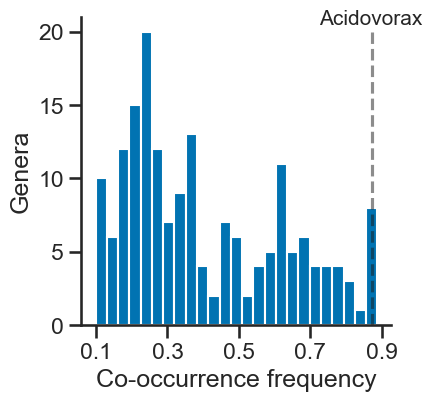

In [60]:
thresh=-10
ref='Rhodanobacter'
occurance=[]
cols=[]
for col in genus.columns:
    if col != ref:
        idx=(genus.loc[:,ref]>thresh)&(genus.loc[:,col]>thresh)
        occurance.append(idx.sum()/len(idx))
        cols.append(col)
plt.figure(figsize=(4,4))
hits=plt.hist(occurance,bins=25)
plt.plot((occurance[0],occurance[0]),(0,20),'k--',alpha=0.5)
plt.text(occurance[0]-.15,20.5,'Acidovorax',fontsize=15)
plt.xlabel('Co-occurrence frequency')
plt.ylabel('Genera')
plt.savefig('Rhodanobacter-cooccurance-hist.pdf',bbox_inches='tight')
plt.xticks([0.1,.3,.5,.7,.9])

# Pathway composition results

<Axes: xlabel='IMG', ylabel='Pathway'>

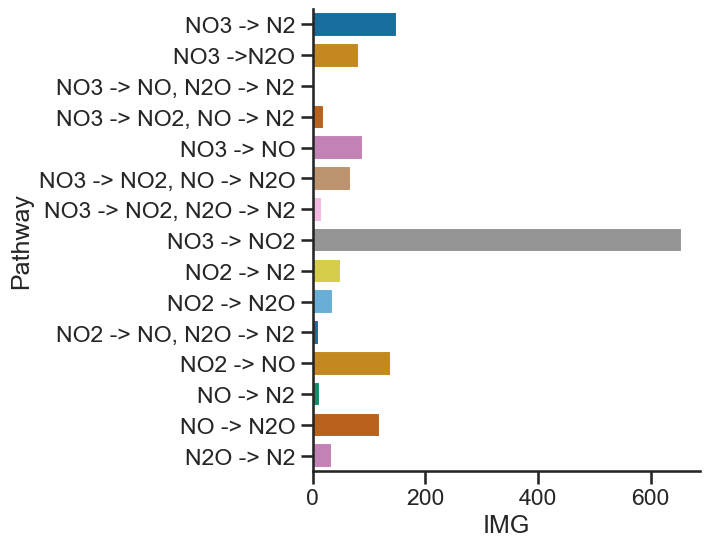

In [72]:
pathways=pd.read_csv('data/Pathway composition.csv')
plt.figure(figsize=(5,6))
sns.barplot(x='IMG',y='Pathway',data=pathways,palette='colorblind')

In [74]:
formatted=[]
for p in pathways.Pathway:
    newp=''
    for l in p:
        if l in ['2','3']:
            l=r'$_{%s}$'%(l)
        if l =='-':
            l=r'$\rightarrow$'
        if l =='>':
            l =''
        
        newp+=l
    formatted.append(newp)
formatted
pathways['formatted-pathway']=formatted

In [76]:
pathways['ENIGMA_percent']=pathways.ENIGMA/pathways.ENIGMA.sum()*100
pathways['IMG_percent']=pathways.IMG/pathways.IMG.sum()*100

(0.0, 45.0)

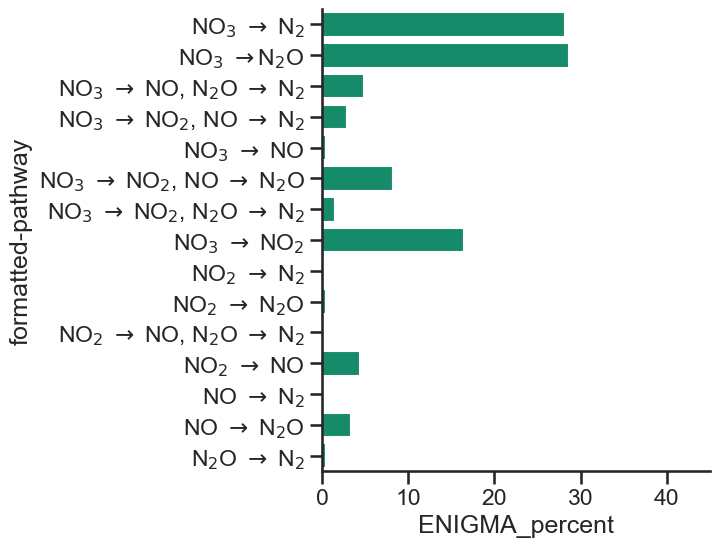

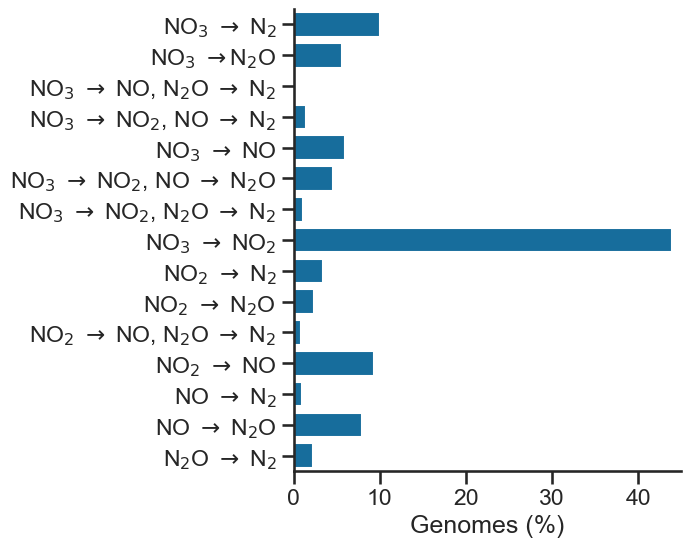

In [78]:
fig,ax= plt.subplots(1,1,figsize=(5,6))


sns.barplot(x='ENIGMA_percent',y='formatted-pathway',data=pathways,color='g',ax=ax)
plt.xlim(0,45)
fig,ax= plt.subplots(1,1,figsize=(5,6))
sns.barplot(x='IMG_percent',y='formatted-pathway',data=pathways,color='b',ax=ax)
plt.xlabel('Genomes (%)')
plt.ylabel('')
plt.xlim(0,45)
#plt.savefig('Pathway-comp-v2.pdf',bbox_inches='tight')
#plt.savefig('Pathway-comp-v2.png',bbox_inches='tight',dpi=250)

In [80]:
pathways['ENIGMA_first']=0.0
pathways['ENIGMA_second']=0.0
pathways['IMG_first']=0.0
pathways['IMG_second']=0.0

idx=pathways[pathways.ENIGMA_percent>pathways.IMG_percent].index.values
pathways.loc[idx,'ENIGMA_first']=pathways.loc[idx,'ENIGMA_percent']

idx=pathways[pathways.ENIGMA_percent<pathways.IMG_percent].index.values
pathways.loc[idx,'ENIGMA_second']=pathways.loc[idx,'ENIGMA_percent']

idx=pathways[pathways.ENIGMA_percent<pathways.IMG_percent].index.values
pathways.loc[idx,'IMG_first']=pathways.loc[idx,'IMG_percent']

idx=pathways[pathways.ENIGMA_percent>pathways.IMG_percent].index.values
pathways.loc[idx,'IMG_second']=pathways.loc[idx,'IMG_percent']

pathways

,Pathway composition,ENIGMA,IMG,Pathway,formatted-pathway,ENIGMA_percent,IMG_percent,ENIGMA_first,ENIGMA_second,IMG_first,IMG_second
0,"Nar/Nap, Nir, Nor, Nos",58,150,NO3 -> N2,NO$_{3}$ $\rightarrow$ N$_{2}$,28.155340,10.067114,28.155340,0.000000,0.000000,10.067114
1,"Nar/Nap, Nir, Nor",59,83,NO3 ->N2O,NO$_{3}$ $\rightarrow$N$_{2}$O,28.640777,5.570470,28.640777,0.000000,0.000000,5.570470
2,"Nar/Nap, Nir, Nos",10,4,"NO3 -> NO, N2O -> N2","NO$_{3}$ $\rightarrow$ NO, N$_{2}$O $\rightarr...",4.854369,0.268456,4.854369,0.000000,0.000000,0.268456
3,"Nar/Nap, Nor, Nos",6,21,"NO3 -> NO2, NO -> N2","NO$_{3}$ $\rightarrow$ NO$_{2}$, NO $\rightarr...",2.912621,1.409396,2.912621,0.000000,0.000000,1.409396
4,"Nar/Nap, Nir",1,89,NO3 -> NO,NO$_{3}$ $\rightarrow$ NO,0.485437,5.973154,0.000000,0.485437,5.973154,0.000000
5,"Nar/Nap, Nor",17,68,"NO3 -> NO2, NO -> N2O","NO$_{3}$ $\rightarrow$ NO$_{2}$, NO $\rightarr...",8.252427,4.563758,8.252427,0.000000,0.000000,4.563758
6,"Nar/Nap, Nos",3,16,"NO3 -> NO2, N2O -> N2","NO$_{3}$ $\rightarrow$ NO$_{2}$, N$_{2}$O $\ri...",1.456311,1.073826,1.456311,0.000000,0.000000,1.073826
7,Nar/Nap,34,655,NO3 -> NO2,NO$_{3}$ $\rightarrow$ NO$_{2}$,16.504854,43.959732,0.000000,16.504854,43.959732,0.000000
8,"Nir, Nor, Nos",0,50,NO2 -> N2,NO$_{2}$ $\rightarrow$ N$_{2}$,0.000000,3.355705,0.000000,0.000000,3.355705,0.000000
9,"Nir, Nor",1,36,NO2 -> N2O,NO$_{2}$ $\rightarrow$ N$_{2}$O,0.485437,2.416107,0.000000,0.485437,2.416107,0.000000


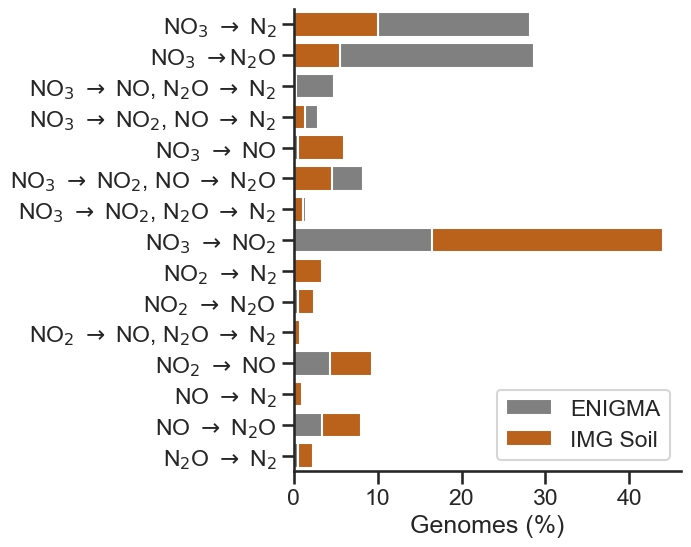

In [82]:
fig,ax= plt.subplots(1,1,figsize=(5,6),)


sns.barplot(x='ENIGMA_first',y='formatted-pathway',data=pathways,color='grey',ax=ax,label='ENIGMA')
sns.barplot(x='IMG_second',y='formatted-pathway',data=pathways,color='r',ax=ax,label='IMG Soil')

sns.barplot(x='IMG_first',y='formatted-pathway',data=pathways,color='r',ax=ax)
sns.barplot(x='ENIGMA_second',y='formatted-pathway',data=pathways,color='grey',ax=ax)

plt.xlabel('Genomes (%)')
plt.ylabel('')
plt.legend()
plt.savefig('Pathway-comp-v3.pdf',bbox_inches='tight')
plt.savefig('Pathway-comp-v3.png',bbox_inches='tight',dpi=250)
